
# Example of a model for handwritten digit classification
MNIST Dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. 
This dataset is considered to be the "hello world" dataset for Computer Vision.

It has a training set of 60,000 examples and a test set of 10,000 examples for handwritten digits with a fixed dimension of 28X28 pixels. 
The goal is to correctly identify digits and find ways to improve the performance of the model. 


In [7]:
!pip3 install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [11]:
!pip3 install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [12]:
!pip3 install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/14/60/12d4f27b859a74359306662da69c2d08826a2b05cfe7f96e66b490f41573/matplotlib-3.8.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/9f/6b/8a1ca4b81d426c104fe42b3cfad9488eaaef0a03fcf98eaecc22b628a013/contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/33/47/f2ca671af61757eaaac608963dda5b76ec9100621e45d0fd63a153fd8cd7/fonttools-4.51.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 9.0 MB/s eta 0:00:00
  Obtaining dependency informati

In [14]:
!pip3 install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/54/b4/9b454f5264ada7c30c889d87b454466fd9ca28cb1bb271dedab2335f946a/keras-3.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/f0/af/dfbea0c69fe725e9e77259d42f4e14eb582eb094200aaf697feb36f513d8/h5py-3.11.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obta

In [19]:
!pip3 install keras.layers

ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [74]:
!pip3 install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [26]:
!pip3 install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=af032ec1c19bcbe7a678957044e34e5da00aad9c704043b97faaea55c35e473d
  Stored in directory: /Users/vesnapetkovic/Library/Caches/pip/wheels/19/0d/33/eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        
import keras
from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers import Dense, Dropout, Activation 
from keras import utils     

# i had an error executing the square bellow
 https://stackoverflow.com/questions/42098126/mac-osx-python-ssl-sslerror-ssl-certificate-verify-failed-certificate-verify
did this: bash /Applications/Python*/Install\ Certificates.command


In [78]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)

print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


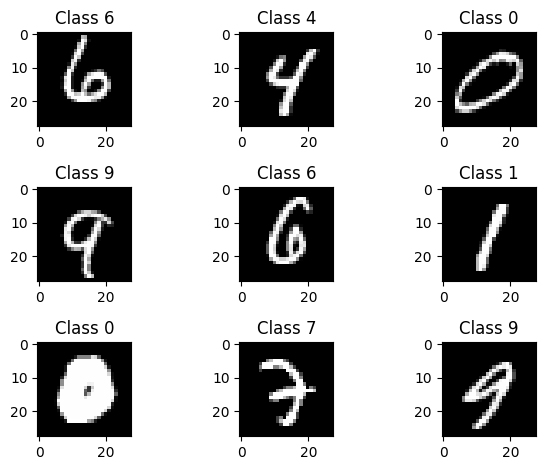

In [79]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

# This is data preprocessing to make it more suitable for model
 we are sending a array (vector) of length 784, which is 28*28, so instead of matrix an array, a flattened matrix
 pixel values range from 0 to 255 where 0 is black and 255 is pure white. 
 We will normalize these values by dividing them by 255 so that we get the output pixel values between [0,1] in the same magnitude.
 The pixel values themselves range from 0 to 255. 
 This scale tells us how dark or light each pixel is, with 0 being pure black and 255 being pure white. 
Everything in between represents different shades of gray or different intensities of colors for RGB images.


In [81]:

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [82]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [75]:
test_data = pd.read_csv('/Users/vesnapetkovic/Documents/ML/test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

In [83]:
#https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
#Since the output will be classified as one of the 10 classes we use the one-hot encoding technique to form the output (Y variable). 
#this means that it's one of the 10 digits 0,1,2,...,9
no_classes = 10
Y_train = utils.to_categorical(y_train, no_classes)
Y_test = utils.to_categorical(y_test, no_classes)

In [84]:
#build the 3 layer neural network, with 3 fully connected layers
#The sequential API allows you to create models layer-by-layer.
model = Sequential()

In [86]:
# The first hidden layer has 512 nodes (neurons) whose input is a vector of size 784. 
# Each node will receive an element from each input vector and apply some weight and bias to it. - this is Dense and means it' fully connected
# activation function of a node defines the output of that node given an input or set of inputs. 
# ReLU stands for Rectified Linear Unit and is a type of activation function. Read more about activation functions here.

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) #returns 0 if input is zero or negative,else returns that number, max(0, x)
model.add(Dropout(0.2)) #indicates that 20% of the input units will be randomly set to zero during each update phase.

In [87]:
#The second hidden layer also has 512 nodes and it takes input from the 512 nodes in the previous layer and gives its output to the next subsequent layer.
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [88]:
#The final layer of 10 neurons in fully-connected to the previous 512-node layer. 
#The final layer should be equal to the number of desired output classes.

model.add(Dense(10))
model.add(Activation('softmax'))

In [90]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
#When compiling a model, Keras asks you to specify your loss function and your optimizer. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Loss Function:
In machine learning, a loss function is like a scoring mechanism that tells us how well our model is performing. 
It quantifies how far off our predictions are from the actual values.
The loss function we're using here is called categorical **cross-entropy**. 
It's specifically designed for classification tasks where the output is a probability distribution over multiple classes (categories).
Think of the loss function as a measure of how good or bad our model's predictions are compared to the true values. 
Lower loss values indicate better performance, while higher loss values indicate worse performance.

# Comparing Probability Distributions:

The categorical cross-entropy loss function is particularly useful when we're dealing with probability distributions,  like when our model predicts the likelihood of each class.
It compares the probability distribution predicted by our model with the actual distribution of the data.
The cross-entropy tells us how different these two distributions are. If they're very similar, the cross-entropy will be low, 
indicating that our model is doing a good job. If they're very different, the cross-entropy will be high, indicating that our model needs improvement.


In [97]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9636 - loss: 0.1168
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9679 - loss: 0.1054
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9712 - loss: 0.0897
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9732 - loss: 0.0847
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9769 - loss: 0.0718


The ```model.fit()``` function in Keras is used to train a neural network model. Here's what each parameter means:

X_train: The input data for training the model. This typically consists of the features or inputs to the model. In the context of a handwritten digit recognition task using the MNIST dataset, X_train would contain the images of the handwritten digits.
Y_train: The target labels corresponding to the input data. This represents the ground truth or the correct outputs that the model should learn to predict. For the MNIST dataset, Y_train would contain the actual digit labels (e.g., 0 to 9) corresponding to each image in X_train.
batch_size: The number of samples to use in each training batch. Training neural networks with mini-batches (i.e., smaller subsets of the training data) is a common practice because it can improve convergence and reduce memory usage. In this case, the model will update its parameters (weights and biases) after processing each batch of data.
epochs: The number of times to iterate over the entire training dataset. One epoch represents one complete pass through the entire training dataset. During each epoch, the model will see all the training examples once and update its parameters accordingly. Increasing the number of epochs allows the model to learn more from the training data, but too many epochs can lead to overfitting.
verbose: Controls the verbosity of the training process. It specifies how much information the fit function should print during training.
verbose=0: Silent mode, no output is printed during training.
verbose=1: Progress bar mode, prints a progress bar and updates it after each epoch.
verbose=2: One line per epoch mode, prints a summary line after each epoch.
Putting it all together, the model.fit() function trains the neural network model using the provided training data (X_train and Y_train) for a specified number of epochs, with a specified batch size, and prints the training progress according to the verbosity level specified.
During training, the weights (parameters) of the neuron connections are initialized with random values. These weights determine the strength of the connections between neurons and play a crucial role in how information flows through the network.

In [98]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.9684 - loss: 0.1009
Test score: 0.08499649912118912
Test accuracy: 0.9733999967575073


In [99]:
import os
save_dir = "/"
model_name = 'my_model.keras'
keras.saving.save_model(model, 'my_model.keras')
print('Saved trained model at %s ' % model_path)

Saved trained model at /keras_mnist.h5 


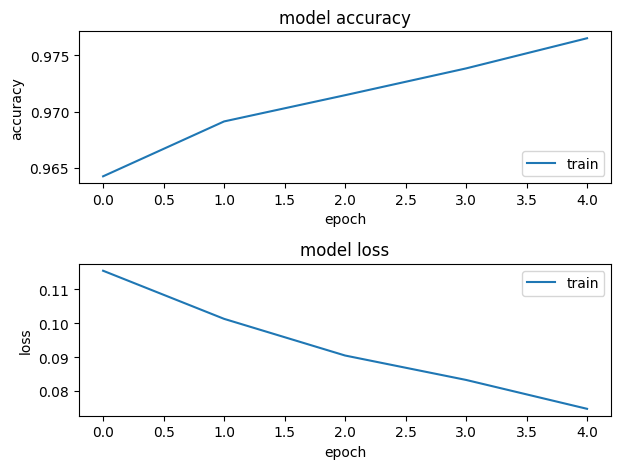

In [100]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [106]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
# Assuming y_test contains class indices
y_test_classes = y_test

# Find correct and incorrect indices
correct_indices = np.nonzero(predicted_classes == y_test_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_classes)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


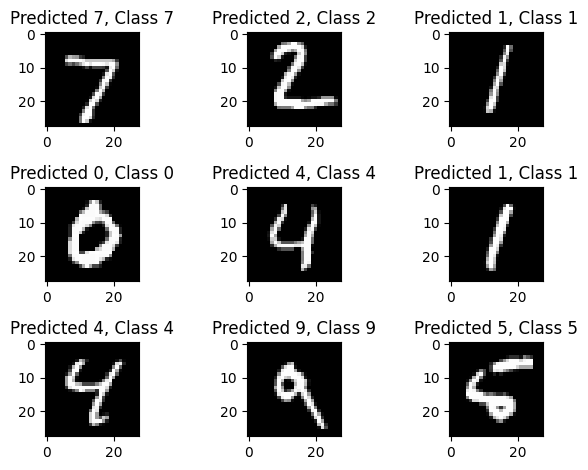

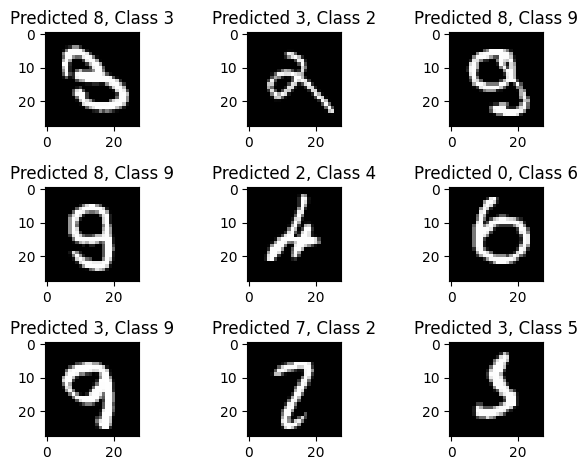

In [107]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

In [32]:
!pip3 install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 30.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [33]:
from IPython.display import Image, display
import cv2

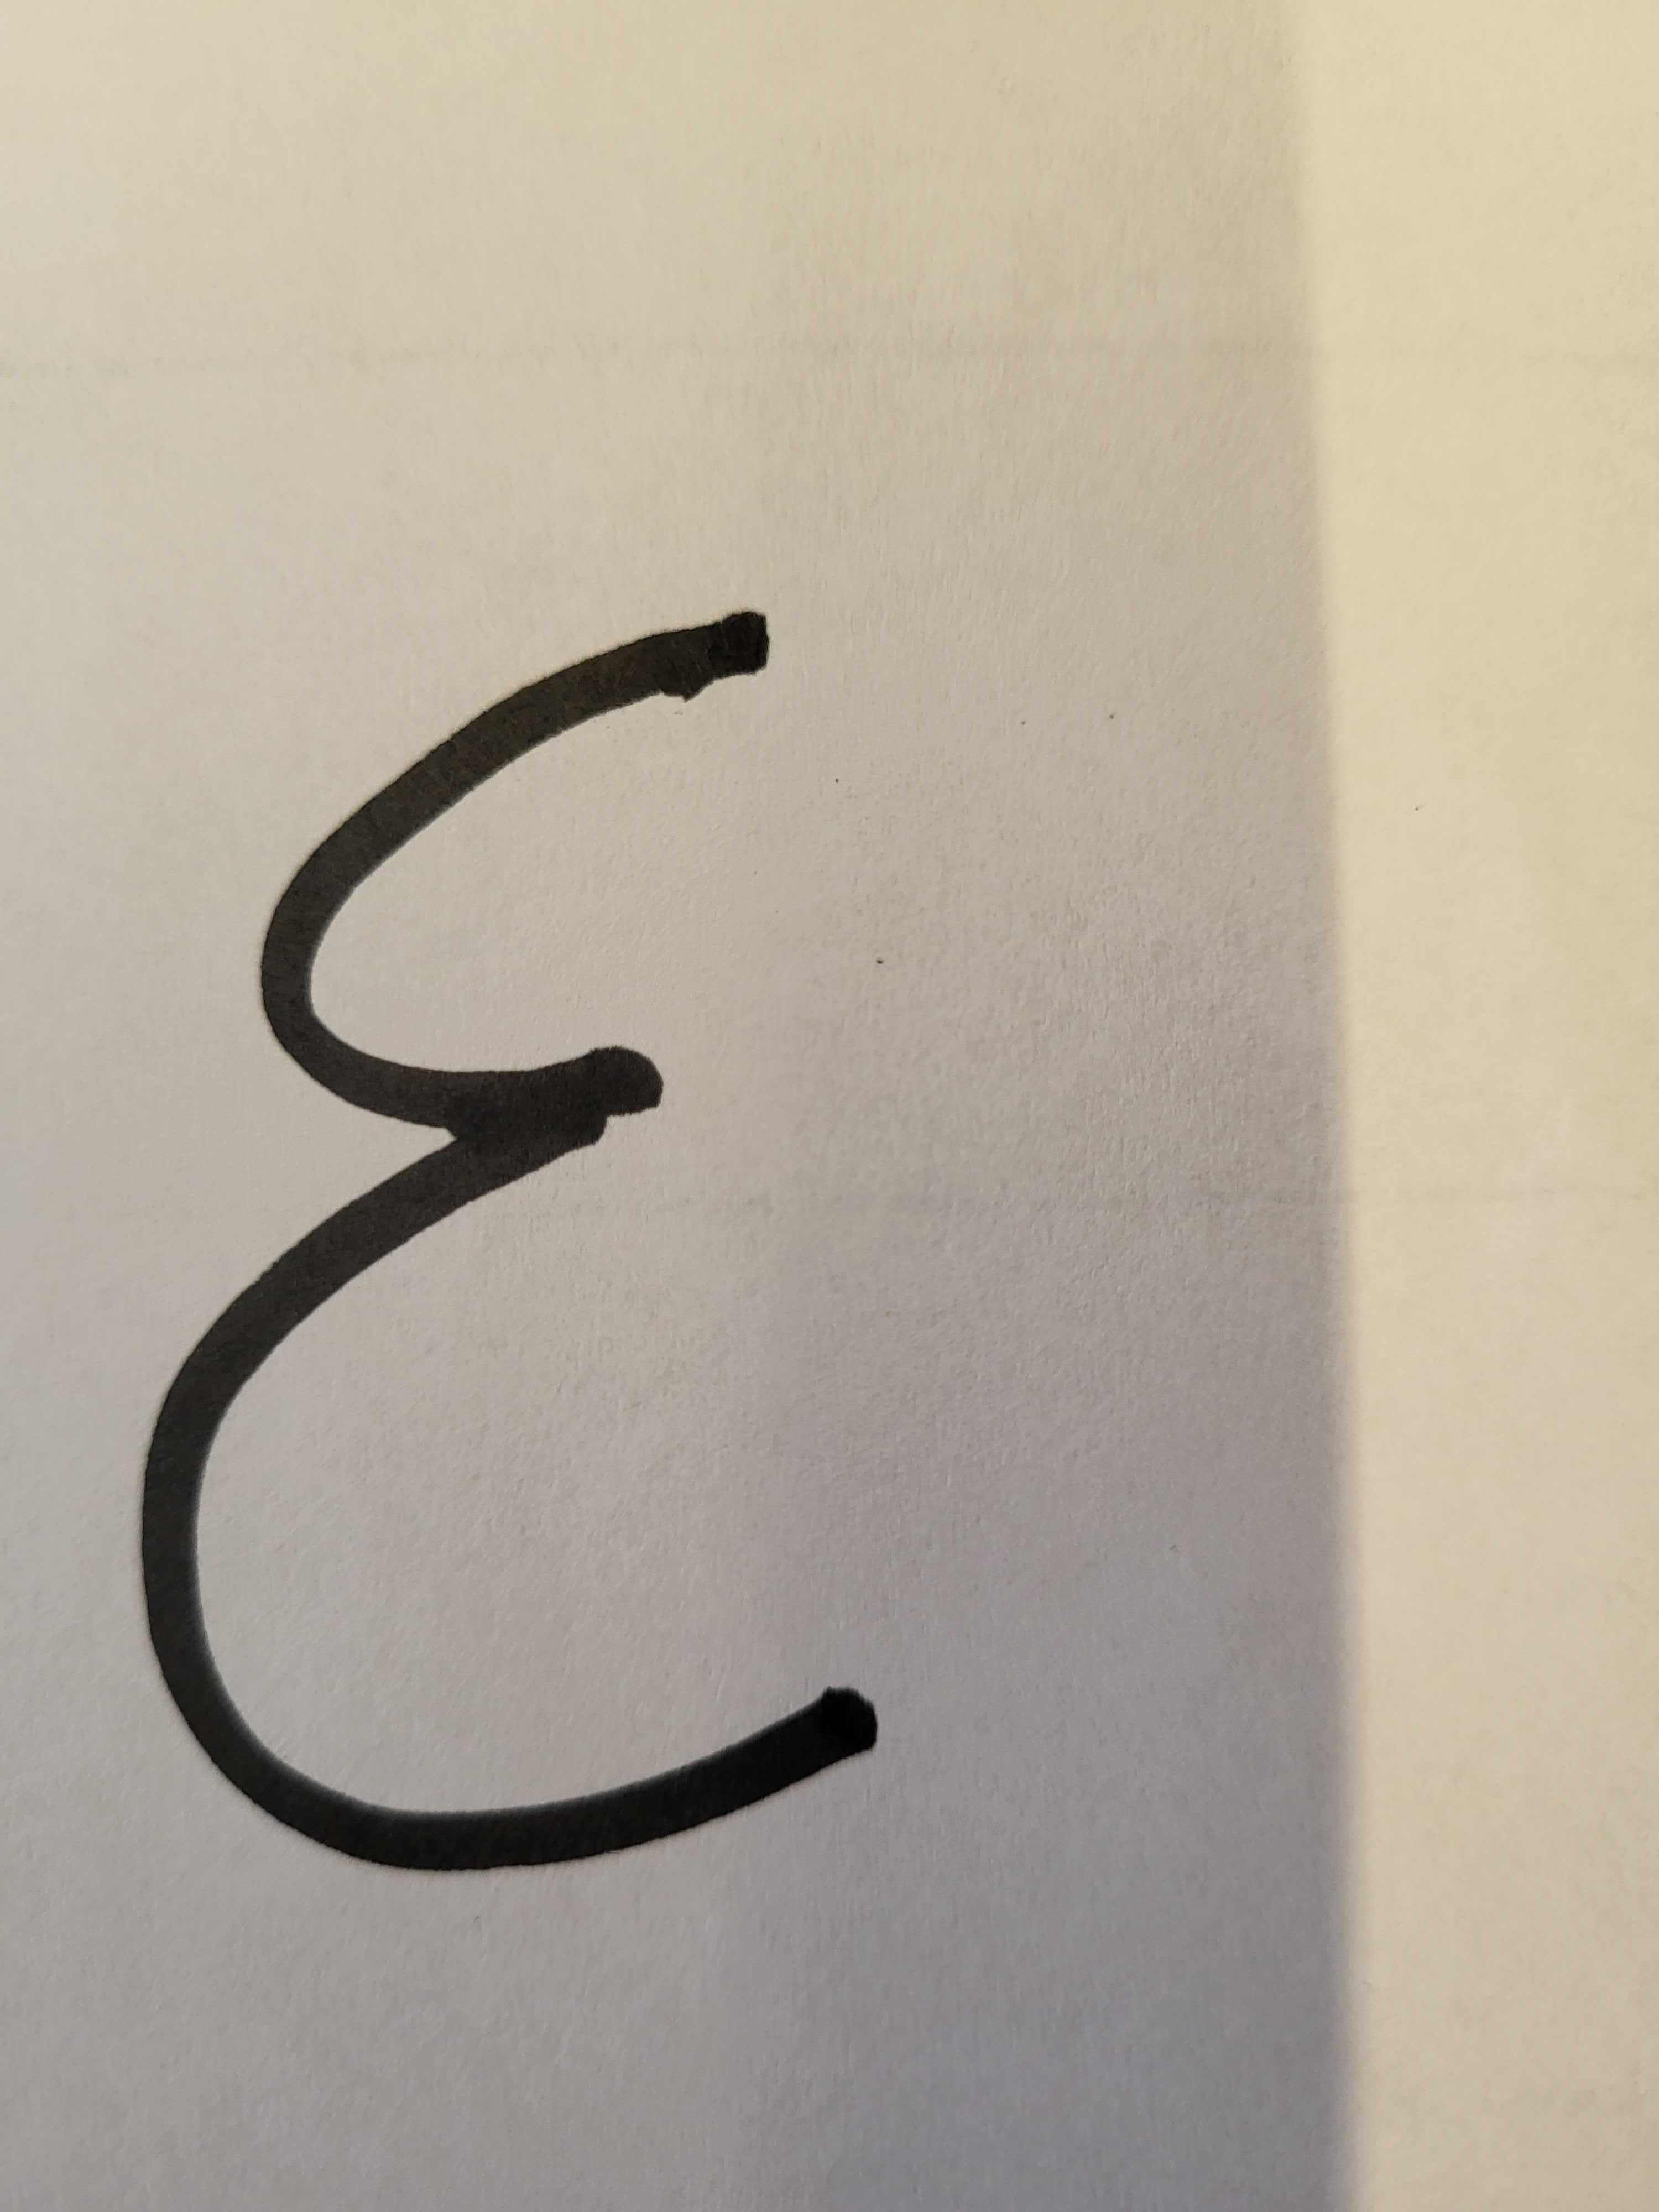

In [49]:
display(Image(filename='/Users/vesnapetkovic/Documents/ml/fake3.jpg'))

In [68]:
filename='/Users/vesnapetkovic/Documents/ml/1.jpg'
image = cv2.imread(filename)

In [62]:
filename='/Users/vesnapetkovic/Documents/ml/fake3.jpg'
image = cv2.imread(filename)

In [69]:
resized_image = cv2.resize(image, (28, 28))

# Assuming resized_image is your resized image with shape (28, 28, 3)
# Convert the image to grayscale if necessary
grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Flatten the image into a 1D array
flattened_image = np.ravel(grayscale_image)

# Reshape the flattened image to match the expected input shape of your model
reshaped_image = flattened_image.reshape(1, 784)

reshaped_image = reshaped_image.astype('float32')
reshaped_image /= 255

In [70]:
predictions = model.predict(reshaped_image)
    
    # Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)
print(predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7


In [66]:
print(predictions)

[[0.04042969 0.01097883 0.02280518 0.05370139 0.0157878  0.47049809
  0.0056696  0.3105251  0.02899547 0.04060886]]


In [108]:
import json
with open('/Users/vesnapetkovic/Documents/ml/test_data.json', 'r') as f:
    data = json.load(f)

# Iterate through each entry in the JSON data
for entry in data:
    # Load and preprocess the image
    image = cv2.imread(entry['image_path'])
    resized_image = cv2.resize(image, (28, 28))

    # Assuming resized_image is your resized image with shape (28, 28, 3)
    # Convert the image to grayscale if necessary
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # Flatten the image into a 1D array
    flattened_image = np.ravel(grayscale_image)
    
    # Reshape the flattened image to match the expected input shape of your model
    reshaped_image = flattened_image.reshape(1, 784)
    
    reshaped_image = reshaped_image.astype('float32')
    reshaped_image /= 255
    predictions = model.predict(reshaped_image)
    
    # Get the index of the class with the highest probability
    predicted_class_index = np.argmax(predictions)
    
    # Compare the predicted class index with the true label index
    if predicted_class_index == entry['true_label_index']:
        print("Prediction for", entry['image_path'], "is correct! Predicted class index:", predicted_class_index)
    else:
        print("Prediction for", entry['image_path'], "is incorrect! Predicted class index:", predicted_class_index, "True class index:", entry['true_label_index'])
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Prediction for /Users/vesnapetkovic/Documents/ml/4.jpg is incorrect! Predicted class index: 3 True class index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Prediction for /Users/vesnapetkovic/Documents/ml/1.jpg is incorrect! Predicted class index: 3 True class index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Prediction for /Users/vesnapetkovic/Documents/ml/fake3.jpg is incorrect! Predicted class index: 3 True class index: -1
